# AI that cannot win Connect-Four
## Introduction

This is a Playground for human players to play with our trained model(s) at Connect-Four, in particular, to attempt losing to our trained model.

### Challenge
Use your skills to __lose__ the match against our trained model.

### Our model
A simple fully connected network with 4 hidden Dense layers as deep-Q model.

~~Insert Meme "it's a simple spell but quite unbreakable" of Dr Strange (not inserted due to potential licensing issues)~~

---
## Game Instructions
You may take a look at [Playing the Game](https://www.wikihow.com/Play-Connect-4#Playing-the-Game) section of [How to Play Connect 4 - wikiHow](https://www.wikihow.com/Play-Connect-4) to get familiar with the game rules first.

You may also look at the [Winning the Game](https://www.wikihow.com/Play-Connect-4#Winning-the-Game) section of the above article for inspirations how to win the game.

__Friendly reminder__ Your goal here is to <u>lose</u> to our trained model, if you can, instead of winning, which you are very likely end up to. (Smiley face).

---
## Preparations before Matches
Please run the following cells to initialise the game environment and load our trained model for matching. No changes is needed unless specified.

### Get Git repo and install dependencies
_Warning: Running this cell will download the Git repo (<20MB) and install dependencies._

You may skip this cell if you have installed the project on your device. Please make sure you have changed the current working directory to the project root directory before proceeding.

In [1]:
# Install Connect-Four environment and training module.
!git clone https://github.com/nicolas-chan-42/COMP-3359-Project-Deep-Q-RL.git
!pip install -e ./COMP-3359-Project-Deep-Q-RL
%cd ./COMP-3359-Project-Deep-Q-RL

### Import needed modules

In [2]:
import os

import gym
from IPython.display import clear_output

# Must be put before any tensorflow import statement.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from losing_connect_four.deep_q_networks import PlaceholderSgdDqn
from losing_connect_four.player import DeepQPlayer, Player, HumanPlayer
from losing_connect_four.training import train_one_episode, load_model_to_players

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Number of physical_devices detected: 1


### Hyper-parameters

In [3]:
"""Hyper-parameters"""
PARAMS = {
    "ENV_NAME": "ConnectFour-v1",
    "LR": 0.001,  # needed for model initialisation
    "REPLAY_BUFFER_MAX_LENGTH": 100_000,  # needed for model initialisation
}

### Configurations
Place the directory path and file basename of trained model here.

Our best trained model `Pretrain2_SimpleDense4_512` has been put into `./saved_models/` for your use.

In [4]:
"""Configurations"""
CONFIG = {
    # Please use "/" only for filepath and directory paths.
    # Use None as placeholder.
    "MODEL_DIR": "saved_models",  # Input directory path here.
    "LOAD_MODEL": ["Pretrain2_SimpleDense4_512", None],  # Input filename here.
}

### Setup Environment

In [5]:
"""Set-up Environment"""
print("\rMaking Connect-Four Gym Environment...", end="")
env = gym.make(PARAMS["ENV_NAME"])
print("\rConnect-Four Gym Environment Made")

Connect-Four Gym Environment Madent...


### Setup Player
You are by default player 2 to have a higher loss rate. You can change this if you know what you are doing.

In [6]:
"""Setup Players"""
ai_player: Player = DeepQPlayer(env, PARAMS, PlaceholderSgdDqn(momentum=0),
                                is_eval=True)
human_player: Player = HumanPlayer(env)

players = {1: ai_player, 2: human_player}
players["trainee_id"] = list(players.values()).index(ai_player) + 1

### Load trained model

In [7]:
"""Load the saved player if requested"""
load_model_to_players(CONFIG, PARAMS, players)

Loaded model Pretrain2_SimpleDense4_512 for DeepQPlayer


---
## Matching
_Warning: Please run everything above first before matching_

Good luck losing!

Game Statistics
--------------------------------------------------
Wins  :   1 (33.3%)
Draws :   0 ( 0.0%)
Losses:   2 (66.7%)
Your are losing more than we expected!
You should be proud of yourself! :)


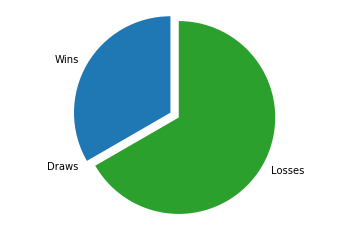

In [8]:
episode = 1
human_player_stats = {"wins": 0, "draws": 0, "losses": 0}

while True:
    print(f"In matching episode {episode}")
    print("-" * 30)

    # Play 1 episode.
    episode_reward, _ = train_one_episode(env, PARAMS, players, 0)

    # Print ending messages.
    env.render()
    if episode_reward > 0:
        print("Congratulations! You won!")
        human_player_stats["wins"] += 1
    elif episode_reward == 0:
        print("Wow! You drew the game! This happens once in a blue moon!")
        human_player_stats["draws"] += 1
    else:
        print("Amazing! You lost! This is a feat if you don't know!")
        human_player_stats["losses"] += 1
    print("-" * 30)

    # Ask if human player want another game.
    is_next_game = None
    while is_next_game is None:
        user_response = input("Next Game? [Y/N] ").lower()

        if user_response in ("y", "1", "yes", "ok", "okay", "true", "t"):
            is_next_game = True
        elif user_response in ("", "no", "0", "n", "false", "f"):
            is_next_game = False
        else:
            print("Sorry, but we can't understand you.")
            continue

    # Clear output and goto next game if requested.
    clear_output(wait=True)
    if is_next_game:
        episode += 1
        continue
    else:
        break

# Print game statistics.
n_wins = human_player_stats["wins"]
n_draws = human_player_stats["draws"]
n_losses = human_player_stats["losses"]
rate_wins = n_wins / episode
rate_draws = n_draws / episode
rate_losses = n_losses / episode

print("Game Statistics")
print("-" * 50)
print(f"Wins  : {n_wins:3} ({rate_wins:=5.1%})")
print(f"Draws : {n_draws:3} ({rate_draws:=5.1%})")
print(f"Losses: {n_losses:3} ({rate_losses:=5.1%})")

if rate_losses > 0.2:
    print("Your are losing more than we expected!")
    print("You should be proud of yourself! :)")
else:
    print("You can do better next time :)")

# Plot pie chart
import matplotlib.pyplot as plt
labels = ("Wins", "Draws", "Losses")
explode = (0, 0, 0.1)
plt.rcParams["figure.facecolor"] = "white"
plt.pie([n_wins, n_draws, n_losses],
        explode=explode, labels=labels, startangle=90)
plt.gca().axis("equal")
plt.show()

---
## Some last words from us
> "We hope that you like our project and enjoy your time failing to lose :)"
>
> -- from Howard Chan and Nicolas Chan

Can you get our model win to you? If not, how about drawing some games to you? We wish you answer "yes" to one of these questions, though we think not likely.

In fact, we did not expect our model to do very well at the beginning of the project. But it definitely exceeded our early expectations in our own tests.

After trying out our model, we hope that you would find our project interesting, and even share it with your friends.

Wish that you can learn something from our trained model about how to play Connect-Four, for real winning instead of losing, of course, by doing the opposite. Please do as we say, not what we do or build.

Last but not least, we hope that you like our project and enjoy your time failing to lose. :)

### You may also like...
* [Losing AI in Reversi (Japanese)](https://othello.to-kei.net/weak/)